We begin with a simple plot to give us a starting point and validate that our simulation is giving sensible results. We would expect that significantly below the critical value, all of the percolation clusters in our simulation would terminate, whilst significantly above the critical value there would be one single cluster which dominates, and does not terminate. A simple plot of log cluster size against log number of clusters over a range of probabilities shows this clearly.

/tmp/ipykernel_1217/3994085646.py:29: RuntimeWarning: divide by zero encountered in log
  x2data += list(np.log(data[:,2]))
/tmp/ipykernel_1217/3994085646.py:28: RuntimeWarning: divide by zero encountered in log
  x1data += list(np.log(data[:,1]))
/tmp/ipykernel_1217/3994085646.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


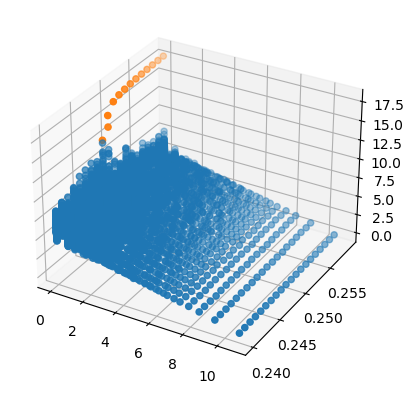

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_size_num_prob_3d(directory, bins=False):
  params = []
  x1data = [] # terminated clusters
  x2data = [] # non-terminated clusters
  ydata = []
  zdata = []

  for filename in sorted(os.listdir(directory)):
    path = os.path.join(directory, filename)

    with open(path) as fp:
      for i, line in enumerate(fp):
          if i == 1:
            params = line.split(',')
            break

    data = np.genfromtxt(path, delimiter=',', skip_header=4)

    if bins == True:
      x1data += list(np.log2(data[:,1] / int(params[3])))
      x2data += list(np.log2(data[:,2] / int(params[3])))
      zdata += list(data[:,0])
    else:
      x1data += list(np.log(data[:,1]))
      x2data += list(np.log(data[:,2]))
      zdata += list(np.log(data[:,0]))
    ydata += [float(params[0]) for _ in data[:,0]]

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter(x1data, ydata, zdata)
  ax.scatter(x2data, ydata, zdata)
  fig.show()
   

plot_size_num_prob_3d("data/p_24_26")


Let $n_s(p)$ be the average number of clusters per lattice point of size $s$ for a given probability $p$. It is known that at the critical threshold $p_c$,

$n_s(p_c) = s^{-\tau}(c_0+c_1s^{-\Omega}+...)$

where $\tau$ is the _fisher exponent_ and $\Omega$ accounts for the leading errors due to the finite size of our lattices.

Taking logs, pulling out a constant factor and taylor expanding, we obtain

$\log(n_s) = -\tau \log(s) + \log(1+a_1s^{-\Omega} + O(s^{-2\Omega})) + a_2= -\tau \log(s) + a_1s^{-\Omega} + a_2 + O(s^{-2\Omega})$

Thus (aside from the effects of $\Omega$) we expect the critical value to occur when we have a log-linear relationship between $n_s$ and $s$. This aligns well with our initial sanity-check plot.

Thus to obtain accurate estimates for $p_c$ (and $\tau$) it remains to generate as much data as possible on the relationship between $n_s$ and $s$, whilst minimising the effects of finite lattice sizes.

/tmp/ipykernel_1217/3994085646.py:24: RuntimeWarning: divide by zero encountered in log2
  x1data += list(np.log2(data[:,1] / int(params[3])))
/tmp/ipykernel_1217/3994085646.py:25: RuntimeWarning: divide by zero encountered in log2
  x2data += list(np.log2(data[:,2] / int(params[3])))
/tmp/ipykernel_1217/3994085646.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[5.47675733e+00 1.78559268e-05 1.51814538e+01 8.95568018e+00]
[4.04783490e+02 2.56821989e+01 3.23822290e+07 3.23822291e+07]


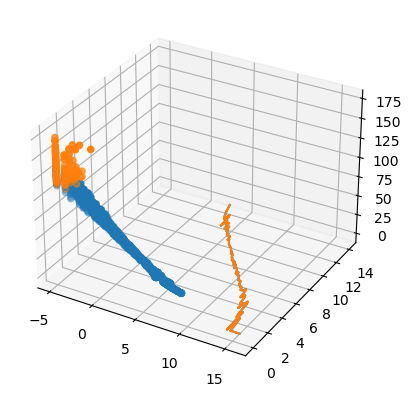

[ 5.30607428e+00 -4.15078688e-06  1.54750342e+01  8.18414889e+00]
[8.97183738e+01 2.87129648e+00 2.57518054e+07 2.57518054e+07]


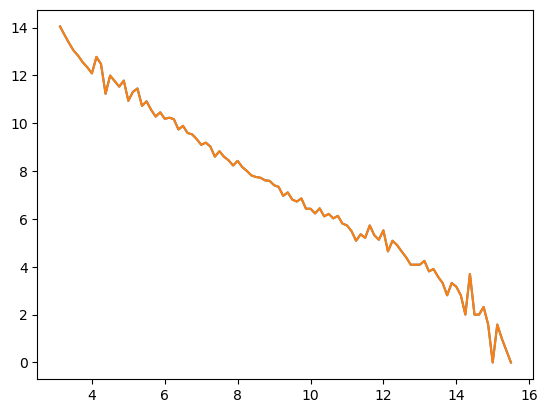

[5.33567651e+00 8.51963275e-07 1.58414422e+01 7.87994847e+00]
[1.23304882e+01 9.64255705e-01 1.39681241e+07 1.39681242e+07]


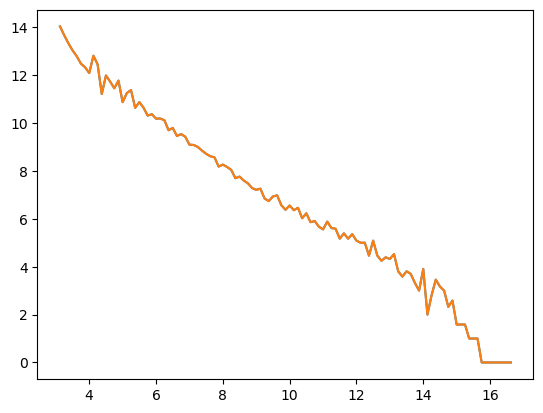

[ 5.42075675e+00 -9.17247738e-05  1.58347751e+01  8.05752553e+00]
[1.82520663e+03 6.48281359e+01 2.37753191e+07 2.37753187e+07]


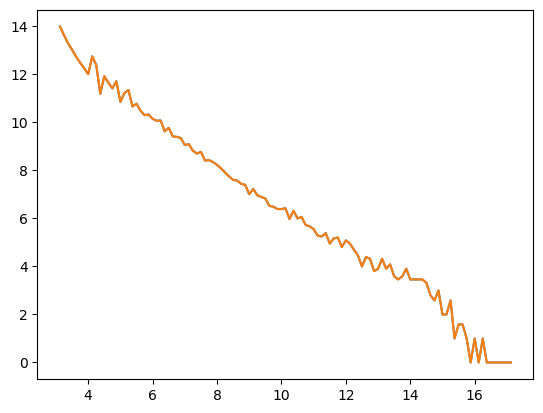

[ 5.36260235e+00 -4.44910848e-05  1.56066868e+01  8.03846089e+00]
[7.05838087e+02 2.60605189e+01 1.97732782e+07 1.97732783e+07]


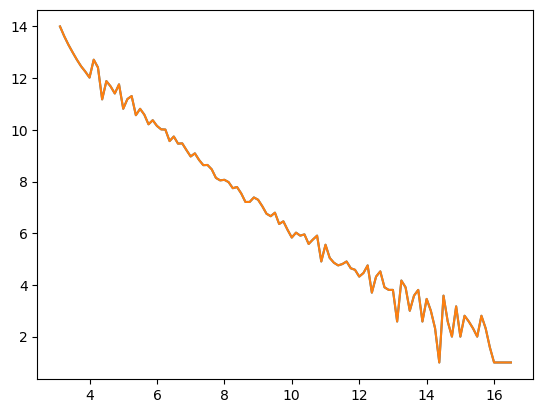

[ 5.73690782e+00 -5.73080252e-06  1.68416077e+01  7.69862019e+00]
[6.91028155e+01 2.75985418e+00 1.33387694e+07 1.33387694e+07]


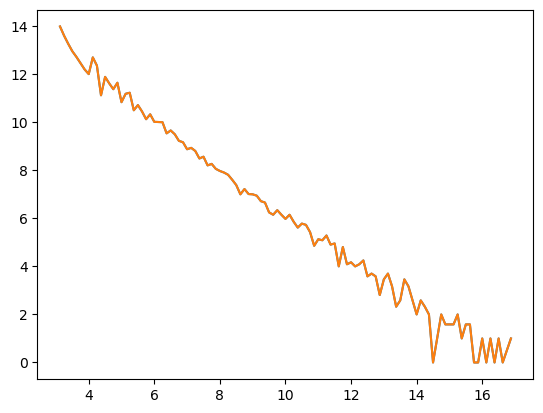

[ 5.91984182e+00 -2.01395609e-05  1.70755073e+01  7.83095213e+00]
[2.56910511e+02 1.24115763e+01 1.18892639e+07 1.18892639e+07]


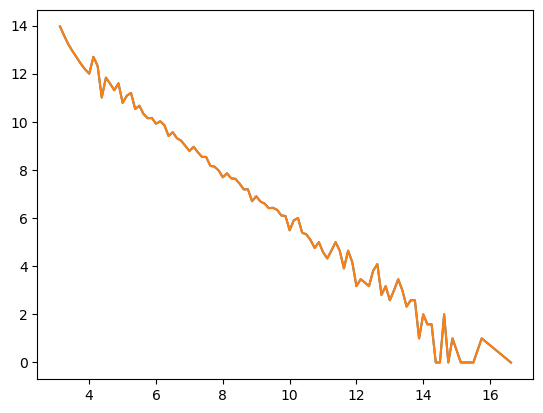

[ 6.02142870e+00 -3.08921751e-05  1.70777155e+01  7.96866097e+00]
[3.21908003e+02 2.00931428e+01 7.92910023e+06 7.92910024e+06]


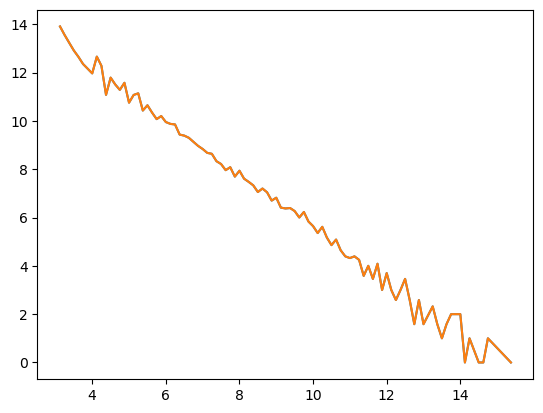

In [19]:
plot_size_num_prob_3d("data/p_244_252", bins=True)

from scipy.optimize import curve_fit

def rhs(size, tau, omega, a1, a2):
  return -tau * np.log2(size) + a1 * size**(-omega) + a2

directory = "data/p_244_252"
params = []

for filename in sorted(os.listdir(directory)):
  path = os.path.join(directory, filename)

  with open(path) as fp:
    for i, line in enumerate(fp):
      if i == 1:
        params = line.split(',')
        break

  data = np.genfromtxt(path, delimiter=',', skip_header=4)

  size_data = [d/8 for i, d in enumerate(data[:, 0]) if data[i, 1] != 0]
  number_data = [np.log2(d) for d in data[:, 1] if d != 0]

  popt, pcov = curve_fit(rhs, size_data, number_data)

  print(popt)
  print(np.sqrt(np.diag(pcov)))

  plt.plot(size_data, number_data)

  pred_num_data = [rhs(s, *popt) for s in size_data]
  plt.plot(size_data, number_data)

  plt.show()

